# Plotting and analysis of a topographic dataset

In [ ]:
# This is a code cell without any tag. You can put convenience code here,
# but it won't be included in any way in the final project.
# For example, to be able to run tests locally in the notebook
# you need to install the following:
# pip install nose
# pip install git+https://github.com/datacamp/ipython_nose
# and then load in the ipython_nose extension like this:
%load_ext ipython_nose

## 1. Load and plot the topographic data

File ArthursSeat.txt contains elevations in metres on an 800×800 grid with 2 m horizontal spacing for our very own Carboniferous volcano. 




- Write a new program to read the elevation file into an array $z$. The file has 800 columns, but you do not need to use usecols; just call `loadtxt` with the file name. Simply calling `plt.imshow(z)` will now make an image map, but there are several things that we will want to change about this default map.
- To have a colour bar beside the map, add `cbar = plt.colorbar(shrink=2)`. The default value of 1 for the shrink keyword argument gives a bar which is taller than the map in this case; find a value < 1 that will make the bar close to the same height as the map.
- Having assigned a name to the colour bar object, there are several methods that can modify it. Use the `set_label()` method with a text string to label the bar, e.g. `cbar.set_label('Elevation (m)')`, and use `cbar.set_ticks(list)` with a list of numbers to set the locations of tick marks on the bar.


<hr>

## Good to know

The `@instructions` to the first task should include a "Good to know" section where you direct the student to resources that could be useful _throughout_ the Project. This could be external documentation, DataCamp courses and exercises, cheat sheets, Stack Overflow answers, etc. 

HINTS

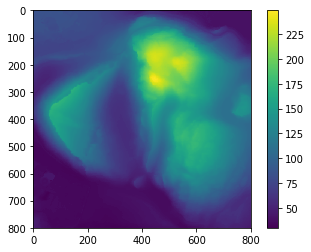

In [15]:
import numpy as np
import matplotlib.pyplot as plt

z=np.loadtxt('datasets/ArthursSeat.txt')

plt.imshow(z)

#cbar = plt.colorbar(shrink=1)
#cbar.set_label('Elevation (m)')
#plt.title('Arthurs seat elevation')



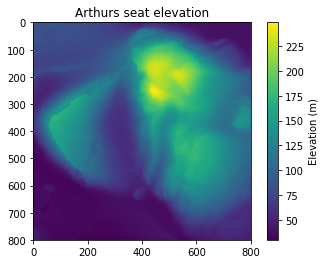

In [17]:
import numpy as np
import matplotlib.pyplot as plt

z=np.loadtxt('datasets/ArthursSeat.txt')

plt.imshow(z)

cbar = plt.colorbar(shrink=1)
cbar.set_label('Elevation (m)')
plt.title('Arthurs seat elevation')


# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'


In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 2. Georeferencing the dataset


If you are familiar with Arthur's Seat in Edinburgh, you will realise that the image is flipped in the north-south direction. Note that the numbers on the y axis are in reverse order. 

This is because the convention for storing images (i.e. a digital photograph will be shown correctly) is to store the top-right pixel first. This can be corrected for map axes with an origin in the lower left corner by adding keyword argument origin='lower' to the imshow command.

We will also do several other corrections to improve the presentation of this map.

The task instructions start with a brief sentence framing the task.

- Add keyword argument `origin='lower'` to the `imshow()` command inside the brackets and separated by a `,`.

- Keyword argument `cmap` in `plt.imshow()` selects the colour map. We can convert it to a greyscale using `cmap='gray'`. Experiment with the Matplotlib colour maps listed at http://matplotlib.org/examples/color/colormaps_reference.html (and see also  http://matplotlib.org/users/colormaps.html) to find ones that you think are particularly good or bad for showing this data.
- The axes are labelled in grid coordinates (numbers of points) rather than geographical coordinates. The correct extents of the axes ($800 × 2 = 1600$ m) can be set with `imshow` with keyword argument `extent=[0,1600,0,1600]`. Use `plt.xticks()` and `plt.yticks()` if you want to control where the axis tick marks are placed and how they are labelled.


This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

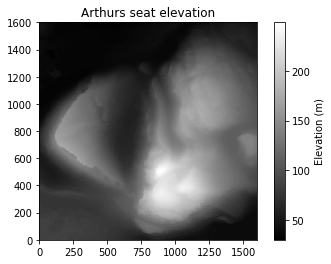

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z=np.loadtxt('datasets/ArthursSeat.txt')

plt.imshow(z,origin='lower',cmap='gray',extent=[0,1600,0,1600])

cbar = plt.colorbar(shrink=1)
cbar.set_label('Elevation (m)')
cbar.set_ticks([50,100,150,200])
plt.title('Arthurs seat elevation')

# Indicate missing code with ...
like_this = ...
# or when a line or more is required, like this:
# ... YOUR CODE FOR TASK 1 ...

In [ ]:
# Your solution code. This won't be shown to the student.

# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

# Put any files you need to access in the `datasets/` folder and 
# then reference them with a relative link, like this:
import pandas as pd
iris = pd.read_csv('datasets/iris.csv')
iris.head()

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 3. Extract the EW and NS gradients

Context / background / story / etc. This will show up in the student's notebook. It should at most have 800 characters and/or 3 paragraphs.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

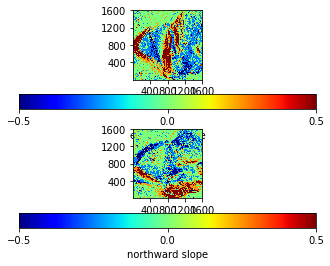

In [10]:
# note there are 2 return values for gradient()
# dx=2 because grid has 2m spacing

dx = 2

dzdy, dzdx = np.gradient(z, dx)

# this means we now write to figure 2 when we plot
plt.figure(2,figsize=(18,4))

plt.subplot(2,1,1)
plt.imshow(dzdx, origin='lower', cmap='jet', extent=[0,1600,0,1600], vmin=-.5, vmax=.5)
cbar = plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_label('eastward slope')
cbar.set_ticks([-.5,0,.5])


plt.subplot(2,1,2)
plt.imshow(dzdy,origin='lower',cmap='jet',extent=[0,1600,0,1600],vmin=-.5,vmax=.5)

cbar = plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_label('northward slope')
cbar.set_ticks([-.5,0,.5])
#cbar.set_ticks([50,100,150,200])


In [ ]:
# Your solution code. This won't be shown to the student.

# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 4. Calculate and plot a map of the slope angles

Context / background / story / etc. This will show up in the student's notebook. It should at most have 800 characters and/or 3 paragraphs.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

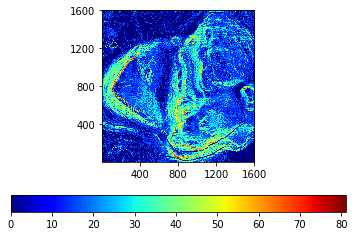

In [8]:
# hillslope magnitude
slope = np.sqrt(dzdx**2 + dzdy**2)

# hillslope angle -- degrees above or below horizontal
slopeangle = np.rad2deg(np.arctan(slope))


plt.imshow(slopeangle,origin='lower',cmap='jet',extent=[0,1600,0,1600])
plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_label('slope angle')
#cbar.set_label('Elevation (m)')
#cbar.set_ticks([50,100,150,200])



In [ ]:
# Your solution code. This won't be shown to the student.

# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 5. Calculate and plot the slope orientations

Context / background / story / etc. This will show up in the student's notebook. It should at most have 800 characters and/or 3 paragraphs.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

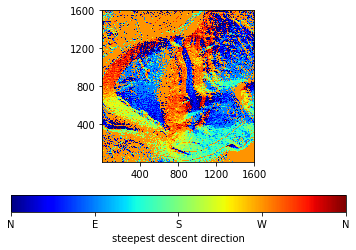

In [7]:
# steepest descent direction -- degrees left of east
#                            -- ranges from -180 to 180
# NOTE: do not convert to degrees if you wish to use a rose diagram
slopedirection = np.rad2deg(np.arctan2(-dzdy,-dzdx))

# converts "left of east" to "right of north" (clockwise)
slopedirection=90-slopedirection

# Above ranges from -90 to 270 -- but we want 0 to 360
# all angles less than zero: add 360o through BOOLEAN INDEXING
# TRY COMMENTING THIS LINE AND SEE HOW IT CHANGES THE FIGURE
slopedirection[slopedirection<0] = slopedirection[slopedirection<0]+360

plt.imshow(slopedirection,origin='lower',cmap='jet',extent=[0,1600,0,1600],vmin=0,vmax=360)
cbar = plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_ticks([0,90,180,270,360])
cbar.set_label('steepest descent direction')
# note 2 different colors correspond to North
# this is why rose diagrams are good for showing angular data!
cbar.set_ticklabels(['N','E','S','W','N'])



In [ ]:
# Your solution code. This won't be shown to the student.

# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 5. Make histograms of the slope angles

Context / background / story / etc. This will show up in the student's notebook. It should at most have 800 characters and/or 3 paragraphs.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

Text(0,0.5,'count')

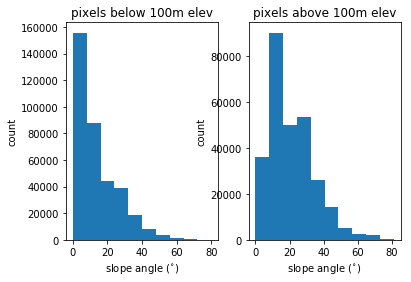

In [11]:
slopehigher = slopeangle[z>=100]
slopelower = slopeangle[z<100]
plt.subplot(1,2,1)
plt.hist(slopelower)
plt.xlabel('slope angle ($^{\circ}$)')
plt.title('pixels below 100m elev')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.hist(slopehigher)
plt.title('pixels above 100m elev')
plt.xlabel('slope angle ($^{\circ}$)')
plt.ylabel('count')


In [ ]:
# Your solution code. This won't be shown to the student.

# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 6. Here goes the title of the sixth task (<= 55 chars)

finally -- see what happens when we change slope angle by 360

Result is physically meaningless but demonstrates effect of boolean indexing

We need to create a new variable as modifying slopeangle will modify above figures
This is a peculiarity of python and plot.show() -- plots have not actually been drawn yet and changing arrays of plots above will have effects

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

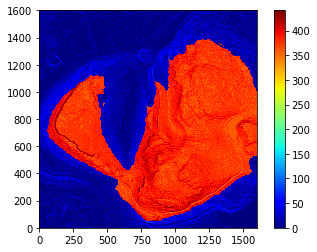

In [12]:
slopeangle2 = slopeangle
slopeangle2[z>=100]=slopeangle2[z>=100]+360
plt.figure(4)
plt.imshow(slopeangle,origin='lower',cmap='jet',extent=[0,1600,0,1600])
plt.colorbar()


In [ ]:
# Your solution code. This won't be shown to the student.

# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 7. Here goes the title of the seventh task (<= 55 chars)

Context / background / story / etc. This will show up in the student's notebook. It should at most have 800 characters and/or 3 paragraphs.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

Text(0.5,1,'Arthurs seat elevation')

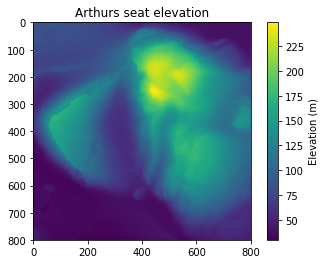

In [13]:
import numpy as np
import matplotlib.pyplot as plt

z=np.loadtxt('datasets/ArthursSeat.txt')

plt.imshow(z,)

cbar = plt.colorbar(shrink=1)
cbar.set_label('Elevation (m)')
plt.title('Arthurs seat elevation')


In [ ]:
# Your solution code. This won't be shown to the student.

# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 8. Here goes the title of the eighth task (<= 55 chars)

Context / background / story / etc. This will show up in the student's notebook. It should at most have 800 characters and/or 3 paragraphs.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 600 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [ ]:
# This is the sample code the student will see. It should
# consist of up to 10 lines of code and comments, and the
# student should have to complete at most 5 lines of code.

# Rule of thumb: Each bullet point in @instructions should
# correspond to a comment in the @sample_code

# Indicate missing code with ...
like_this = ...
# or when a line or more is required, like this:
# ... YOUR CODE FOR TASK 8 ...

In [ ]:
# Your solution code. This won't be shown to the student.

# The @solution should mirror the corresponding @sample_code,
# but with the missing parts filled in.
like_this = 'missing part filled in'

# It should consist of up to 10 lines of code and comments 
# and take at most 5 seconds to execute on an average laptop.

In [ ]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

*The recommended number of tasks in a DataCamp Project is between 8 and 10, so feel free to add more if necessary. You can't have more than 12 tasks.*